<a href="https://colab.research.google.com/github/wdrdg/ML-model/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import scipy.sparse
import string
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string
from sklearn.naive_bayes import MultinomialNB
np.random.seed(1234)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load 20news group dataset




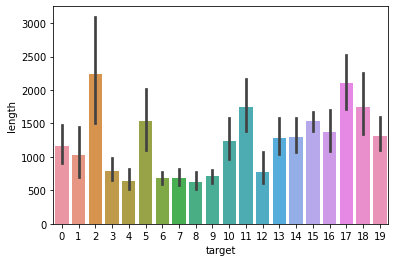

In [ ]:
twenty_train = fetch_20newsgroups(subset='train', remove=['headers', 'footers', 'quotes'], shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', remove=['headers', 'footers', 'quotes'], shuffle=True, random_state=42)
twenty_train_x = twenty_train["data"]
twenty_train_y = twenty_train["target"] 
twenty_test_x = twenty_test["data"]
twenty_test_y = twenty_test["target"]
df_twenty=pd.DataFrame()
df_twenty['mess'] = twenty_train_x
df_twenty['target']=twenty_train_y
df_twenty['length']=df_twenty['mess'].apply(len)
df_twenty_test = pd.DataFrame()
df_twenty_test['message'] = twenty_test_x
df_twenty_test['target'] = twenty_test_y
#df_twenty.head()
sns.barplot(x='target',y='length',data=df_twenty)

# Load IMDB Reviews dataset

In [ ]:
'''
from google.colab import files
uploaded = files.upload()
'''


'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
'''
imdb_train_x = pd.read_csv(io.BytesIO(uploaded['train.csv']))['review']
imdb_train_y = pd.read_csv(io.BytesIO(uploaded['train.csv']))['label']
imdb_test_x = pd.read_csv(io.BytesIO(uploaded['test.csv']))['review']
imdb_test_y = pd.read_csv(io.BytesIO(uploaded['test.csv']))['label']
'''


#how to use: upload train.csv and test.csv to Google Drive -> mount drive -> run this code snippet
imdb_train_x = pd.read_csv('/content/drive/MyDrive/train.csv')['review']
imdb_train_y = pd.read_csv('/content/drive/MyDrive/train.csv')['label']
imdb_train_rate = pd.read_csv('/content/drive/MyDrive/train.csv')['rating']
imdb_test_x = pd.read_csv('/content/drive/MyDrive/test.csv')['review']
imdb_test_y = pd.read_csv('/content/drive/MyDrive/test.csv')['label']
imdb_test_rate = pd.read_csv('/content/drive/MyDrive/test.csv')['rating']

df_imdb=pd.DataFrame()
df_imdb['mess'] = imdb_train_x
df_imdb['target']=imdb_train_y
df_imdb['rating']=imdb_train_rate
# print(df_imdb['mess'])

# Use logistic regression on text before cleaning

In [ ]:
lg = LogisticRegression()
print(kfoldCV(i m))

# Defining the text cleaning functions

In [ ]:
import re
'''
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

def text_process(mess):
    no_punc=[c for c in mess if c not in string.punctuation]
    no_punc=''.join(no_punc)
    no_html = cleanhtml(no_punc)
    cleaned_mess=[word for word in no_html.split() if word.lower() not in stopwords.words('english')]
    cleaned_mess = ' '.join(cleaned_mess)
    return cleaned_mess
'''
transform_to_lower = lambda s: s.lower()

remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

# Filters to be executed in pipeline
CLEAN_FILTERS = [strip_tags,
                strip_numeric,
                strip_punctuation, 
                strip_multiple_whitespaces, 
                transform_to_lower,
                remove_stopwords,
                remove_single_char]
          
def cleaning_pipe(document):
    # Invoking gensim.parsing.preprocess_string method with set of filters
    processed_words = preprocess_string(document, CLEAN_FILTERS)
    processed_words = ' '.join(processed_words)
    return processed_words

#Cleaning the data

In [ ]:

df_twenty['message']=df_twenty['mess'].apply(cleaning_pipe)
df_twenty.drop('mess',axis=1,inplace=True)


In [ ]:

df_imdb['message']=df_imdb['mess'].apply(cleaning_pipe)
df_imdb.drop('mess',axis=1,inplace=True)


#Evaluation Function

In [ ]:
def evaluate_acc(true_labels, target_labels):
  return np.sum(true_labels == target_labels)/true_labels.shape[0]
def logsumexp(Z):                                                # dimension C x N
  Zmax = np.max(Z,axis=0)[None,:]                              # max over C
  log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
  return log_sum_exp

# Gaussian Naive Bayes

In [ ]:
class NaiveBayes():
  def __init__(self, k):
    self.k=k

    
  def fit(self, x, y):
    N, D = x.shape
    C = np.max(y) + 1
    # one parameter for each feature conditioned on each class
    mu, sigma = np.zeros((C,D)), np.zeros((C,D))
    Nc = np.zeros(C) # number of instances in class c
    # for each class get the MLE for the mean and std
    for c in range(C):
        x_c = x[y == c]                           #slice all the elements from class c
        Nc[c] = x_c.shape[0]                      #get number of elements of class c

        #print(x_c.shape)  #for testing only, remove later=================

        mu[c,:] = np.mean(x_c,0)                  #mean of features of class c
        #print(sigma.shape)
        sigma[c,:] = np.std(x_c, 0) + (1e-9)*np.var(x, axis=0).max()    # add small value epsilon for zero
        # print(sigma.shape)
        # print(mu.shape)
    self.mu = mu                                  # C x D
    self.sigma = sigma                            # C x D
    self.pi = (Nc+self.k)/(N+C*self.k)                        #Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
    return self
  


  def predict(self, xt):
    Nt, D = xt.shape
    # for numerical stability we work in the log domain
    # we add a dimension because this is added to the log-likelihood matrix 
    # that assigns a likelihood for each class (C) to each test point, and so it is C x N
    batches = []
    for batch in np.array_split(xt, 20):
      log_prior = np.log(self.pi)[:, None]
      # logarithm of the likelihood term for Gaussian 
      # the first two terms are the logarithm of the normalization term in the Gaussian and the final term is the exponent in the Gaussian. 
      # Notice that we are adding dimensions (using None) to model parameters and data to make this evaluation. 
      # The reason is that sigma and mu are C x D, while the data x is N x D. We operate on a C x N x D shape by increasing the number of dimensions when needed
      log_likelihood = -.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((batch[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)
      log_likelihood = np.sum(log_likelihood, axis=2)
      # posterior calculation
      log_posterior = log_prior + log_likelihood
      posterior = np.exp(log_posterior - logsumexp(log_posterior))
      y_pred = np.argmax(posterior.T, 1)
      
      batches = batches + y_pred.tolist()
      # print(batches)
    return np.asarray(batches)


# K-fold cross validation

In [ ]:
def cross_validation_split(x, split=5):  # this function returns indices
    lst = list(range(len(x)))
    np.random.shuffle(lst)
    folds = np.array_split(lst, split)
    for i in range(split):
      train_idx = np.concatenate(*[folds[:i] + folds[i+1:]]) #np.concatenate(*[folds[:i] + folds[i+1:]])
      vali = folds[i]
      yield train_idx.flatten(), vali


def kfoldCV(x, y, model, toArray=False): # input raw data without tf-idf, in this pj, the input x is  the df["message"]
    records = []
    for train_index, vali_index in cross_validation_split(x):
        y_train = np.array( [y[i] for i in train_index])
        x_train= np.array([x[i] for i in train_index])
        y_vali = np.array(y[vali_index])
        x_vali = np.array([x [i] for i in vali_index])
        
        count_vect = CountVectorizer(min_df=5, max_df=0.7)
        train_counts = count_vect.fit_transform(x_train)
        vali_counts = count_vect.transform(x_vali)
        # """using tf-idf to form frequncy"""
        tfidf_transformer = TfidfTransformer()
        train_tfidf = tfidf_transformer.fit_transform(train_counts) 
        vali_tfidf = tfidf_transformer.transform(vali_counts)
        if(toArray):
          train_tfidf= train_tfidf.toarray()
          vali_tfidf = vali_tfidf.toarray()
        #above process the plain text data to tfidf (should use the same veotrizer for the same set of train and vali)

        trained_model = model.fit(train_tfidf, y_train)
        accuracy = evaluate_acc(trained_model.predict(vali_tfidf), y_vali)
        records.append(accuracy)
    return sum(records) / len(records)

# Finding the best hyperparameter value for naive bayes

In [ ]:
############ Our own Gaussian Naive Bayes experiments

#For the twenty news group dataset
twenty_accuracies_NB=[]
for k in range(1,10):
  nb = MultinomialNB(k)
  twenty_accuracies_NB.append(kfoldCV(df_twenty['message'],twenty_train_y,nb))
plt.xticks(range(1,10,1))
plt.title("Accuracy using different hyperparameter value for smoothing, in naive bayes, for twenty dataset")
plt.plot( range(1,10),twenty_accuracies_NB, '-', label="Accuracies")
plt.legend()
plt.show()
print(f"largest accuracy when K = {twenty_accuracies_NB.index(max(twenty_accuracies_NB))+1}, the accuracy is {max(twenty_accuracies_NB)*100:.1f}\n")



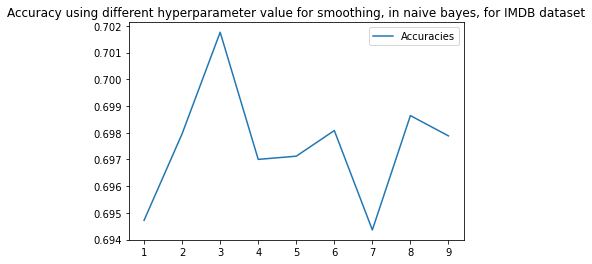

largest accuracy when K = 3, the accuracy is 70.2



In [ ]:
#For the IMDB reviews dataset
imdb_accuracies_NB=[]
for k in range(1,10):
  nb = NaiveBayes(k)
  imdb_accuracies_NB.append(kfoldCV(df_imdb['message'],imdb_train_y,nb,k))
plt.xticks(range(1,10,1))
plt.title("Accuracy using different hyperparameter value for smoothing, in naive bayes, for IMDB dataset")
plt.plot( range(1,10),imdb_accuracies_NB, '-', label="Accuracies")
plt.legend()
plt.show()
print(f"largest accuracy when K = {imdb_accuracies_NB.index(max(imdb_accuracies_NB))+1}, the accuracy is {max(imdb_accuracies_NB)*100:.1f}\n")

In [ ]:
############ SKLearn Gaussian Naive Bayes experiments

#For the twenty news group dataset
'''
gnb = GaussianNB()
gnb.fit(twenty_train_sets[0].toarray(), twenty_train_target_sets[0])
print(gnb.class_prior_)

#For the IMDB reviews dataset
gnb = GaussianNB()
gnb.fit(imdb_train_sets[0].toarray(), imdb_train_target_sets[0])
print(gnb.class_prior_)
'''

In [ ]:
'''
print(twenty_accuracies_NB)
'''

# Logistic Regression Hyper parameter tuning 20News

In [ ]:

twenty_accuracies_LG_newton=[]
twenty_accuracies_LG_liblinear=[]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]


# newtwon-cg
for c in c_values:
  nb = LogisticRegression(solver=solvers[0], C=c)
  twenty_accuracies_LG_newton.append(kfoldCV(df_twenty['message'],twenty_train_y,nb))

print(f"largest accuracy when c = {c_values[twenty_accuracies_LG_newton.index(max(twenty_accuracies_LG_newton))]}, the accuracy is {max(twenty_accuracies_LG_newton)*100:.1f}\n")


for c in c_values:
  nb = LogisticRegression(solver=solvers[2], C=c)
  twenty_accuracies_LG_liblinear.append(kfoldCV(df_twenty['message'],twenty_train_y,nb))

print(f"largest accuracy when c = {c_values[twenty_accuracies_LG_liblinear.index(max(twenty_accuracies_LG_liblinear))]}, the accuracy is {max(twenty_accuracies_LG_liblinear)*100:.1f}\n")


In [ ]:
print(twenty_accuracies_LG_newton)

[0.707884692549541, 0.7092984321259268, 0.7149555002572814, 0.7172533740607856, 0.6562657724130899, 0.4677365827776481]


# Logistic regression hyperparameter tuning for IMDB dataset

In [ ]:
imdb_accuracies_LG_newton=[]
imdb_accuracies_LG_lbfgs=[]
imdb_accuracies_LG_liblinear=[]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

nb = LogisticRegression(solver=solvers[0], C=c)
imdb_accuracies_LG_newton.append(kfoldCV(df_imdb['message'],imdb_train_y,nb))

# newtwon-cg
for c in c_values:
  nb = LogisticRegression(solver=solvers[0], C=c)
  imdb_accuracies_LG_newton.append(kfoldCV(df_imdb['message'],imdb_train_y,nb))

print(f"largest accuracy when c = {imdb_accuracies_LG_newton.index(max(imdb_accuracies_LG_newton))+1}, the accuracy is {max(imdb_accuracies_LG_newton)*100:.1f}\n")

for c in c_values:
  nb = LogisticRegression(solver=solvers[2], C=c)
  imdb_accuracies_LG_liblinear.append(kfoldCV(df_imdb['message'],imdb_train_y,nb))

print(f"largest accuracy when c = {imdb_accuracies_LG_liblinear.index(max(imdb_accuracies_LG_liblinear))+1}, the accuracy is {max(imdb_accuracies_LG_liblinear)*100:.1f}\n")

In [ ]:
'''
imdb_accuracies_LR=[]


nb = LogisticRegression(penalty='l2')
imdb_accuracies_LR.append(kfoldCV(df_imdb['message'],imdb_train_y,nb))
print(imdb_accuracies_LR)
'''

# Splitting to different size


In [ ]:
#twenty review dataset
twenty_train_sets = []   # 100%, 80%, 60%, 40%, 20%
twenty_test_sets = []   # use the same count vectorizer as corresponding train set

twenty_train_sets_raw = []   # raw data for running K-fold CV later. In case not needed, please remove (Jeff 0228 19:18 wrote)

twenty_train_target_sets = []
for i in range(5):
    twenty_idx = np.random.permutation(len(df_twenty['message']))
    idx_to_select = twenty_idx[:int(len(twenty_idx)/(i+1))+1]
    train_target = df_twenty['target'][idx_to_select]
    twenty_train_target_sets.append(train_target)
  
    # twenty_train_sets_raw.append(df_twenty['message'][idx_to_select])     #Here as well (Jeff 0228)

    count_vect = CountVectorizer(min_df=5, max_df=0.7)
    twenty_train_counts = count_vect.fit_transform(df_twenty['message'][idx_to_select])
    tfidf_transformer = TfidfTransformer()
    twenty_train_tfidf = tfidf_transformer.fit_transform(twenty_train_counts)
    twenty_train_tfidf = twenty_train_tfidf.toarray()   # to array by RS
    twenty_test_counts = count_vect.transform(twenty_test_x)
    twenty_test_tfidf = tfidf_transformer.transform(twenty_test_counts)
    twenty_test_tfidf = twenty_test_tfidf.toarray()     # to array by RS 
    twenty_train_sets.append(twenty_train_tfidf)
    twenty_test_sets.append(twenty_test_tfidf)

  


# twenty_train_target_sets = np.array(twenty_train_target_sets)
# twenty_test_sets = np.array(twenty_test_sets)
# twenty_train_sets = np.array(twenty_train_sets)

In [ ]:
#imdb review dataset
imdb_train_sets = []   # 100%, 80%, 60%, 40%, 20%
imdb_test_sets = []   # use the same count vectorizer as corresponding train set
imdb_train_target_sets = []
for i in range(5):
    imdb_idx = np.random.permutation(len(df_imdb['message']))
    idx_to_select = imdb_idx[:int(len(imdb_idx)/(i+1))+1]
    train_target = df_imdb['target'][idx_to_select]
    imdb_train_target_sets.append(train_target)

    count_vect = CountVectorizer(min_df=5, max_df=0.7)
    imdb_train_counts = count_vect.fit_transform(df_imdb['message'][idx_to_select])
    imdb_test_counts = count_vect.transform(imdb_test_x)
    tfidf_transformer = TfidfTransformer()
    imdb_train_tfidf = tfidf_transformer.fit_transform(imdb_train_counts)
    imdb_train_tfidf = imdb_train_tfidf.toarray()
    imdb_test_tfidf = tfidf_transformer.transform(imdb_test_counts)
    imdb_test_tfidf = imdb_test_tfidf.toarray()
    imdb_train_sets.append(imdb_train_tfidf)
    imdb_test_sets.append(imdb_test_tfidf)
    
# imdb_train_target_sets = np.array(imdb_train_target_sets)
# imdb_test_sets = np.array(imdb_test_sets)
# imdb_train_sets = np.array(imdb_train_sets)

# Comparing different size of training data

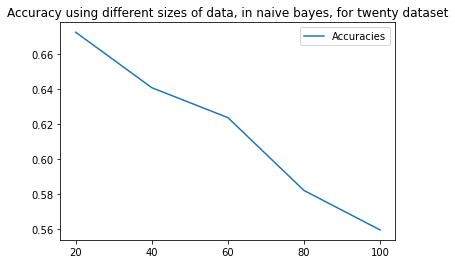

largest accuracy when data size(%) = 20, the accuracy is 67.3

0.5594795539033457


In [ ]:
#Different sizes of data with naive bayes, using twenty dataset
nb_accs_twenty = []

for i in range(5):
  nb=MultinomialNB(1)
  result_nb = nb.fit(twenty_train_sets[i], twenty_train_target_sets[i]).predict(twenty_test_sets[i])
  nb_accs_twenty.append(evaluate_acc(result_nb, twenty_test_y))

plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in naive bayes, for twenty dataset")
plt.plot([20,40,60,80,100],nb_accs_twenty, '-', label="Accuracies")
plt.legend()
plt.show()
print(f"largest accuracy when data size(%) = {20*(nb_accs_twenty.index(max(nb_accs_twenty))+1)}, the accuracy is {max(nb_accs_twenty)*100:.1f}\n")
print(nb_accs_twenty[-1])






In [ ]:
#Different sizes of data with naive bayes, using imdb dataset
nb_accs_imdb = []
for i in range(5):
  nb=NaiveBayes(k=3)
  result_nb = nb.fit(imdb_train_sets[i], imdb_train_target_sets[i]).predict(imdb_test_sets[i])
  nb_accs_imdb.append(evaluate_acc(result_nb, imdb_test_y))

plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in naive bayes, for imdb dataset")
plt.plot( [20,40,60,80,100],nb_accs_imdb, '-', label="Accuracies")
plt.legend()
plt.show()
print(f"largest accuracy when data size(%) = {20*(nb_accs_imdb.index(max(nb_accs_imdb))+1)}, the accuracy is {max(nb_accs_imdb)*100:.1f}\n")

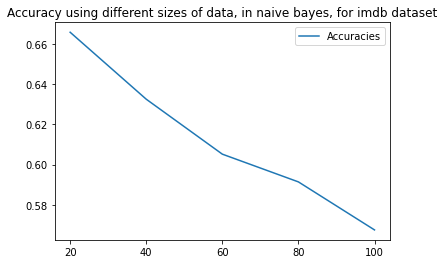

largest accuracy when data size(%) = 20, the accuracy is 66.6

0.5674455655868296


In [ ]:
lg_accs_twenty = []
for i in range(5):
  lg=LogisticRegression(solver='newton-cg', C=10)
  result_nb = lg.fit(twenty_train_sets[i], twenty_train_target_sets[i]).predict(twenty_test_sets[i])
  lg_accs_twenty.append(evaluate_acc(result_nb, twenty_test_y))

plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in naive bayes, for imdb dataset")
plt.plot( [20,40,60,80,100],lg_accs_twenty, '-', label="Accuracies")
plt.legend()
plt.show()
print(f"largest accuracy when data size(%) = {20*(lg_accs_twenty.index(max(lg_accs_twenty))+1)}, the accuracy is {max(lg_accs_twenty)*100:.1f}\n")
print(lg_accs_twenty[-1])

In [ ]:
lg_accs_imdb = []
for i in range(5):
  lg=LogisticRegression(solver='liblinear', C=10)
  result_nb = lg.fit(imdb_train_sets[i], imdb_train_target_sets[i]).predict(imdb_test_sets[i])
  lg_accs_imdb.append(evaluate_acc(result_nb, imdb_test_y))

plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in naive bayes, for imdb dataset")
plt.plot( [20,40,60,80,100],lg_accs_imdb, '-', label="Accuracies")
plt.legend()
plt.show()
print(f"largest accuracy when data size(%) = {20*(lg_accs_imdb.index(max(lg_accs_imdb))+1)}, the accuracy is {max(lg_accs_imdb)*100:.1f}\n")

In [ ]:
'''
nb_accs_twenty = []
lr_accs_twenty = []
nb_accs_imdb = []
lr_accs_imdb = []
BestNaiveBayes = MultinomialNB(alpha=1)
BestLogisticReg = LogisticRegression()
for i in range(5):
  result_nb = BestNaiveBayes.fit(twenty_train_sets[i], twenty_train_target_sets[i]).predict(twenty_test_sets[i])
  nb_accs_twenty.append(evaluate_acc(result_nb, twenty_test_y))
  
print(nb_accs_twenty)
for j in range(5):
  nb_accs_imdb.append(evaluate_acc(BestNaiveBayes.fit(imdb_train_sets[j], imdb_train_target_sets[j]).predict(imdb_test_sets[j]), imdb_test_y))
  lr_accs_imdb.append(evaluate_acc(BestLogisticReg.fit(imdb_train_sets[j], imdb_train_target_sets[j]).predict(imdb_test_sets[j]), imdb_test_y))
'''

In [ ]:
'''
for j in range(5):
  nb_accs_twenty.append(evaluate_acc(BestNaiveBayes.fit(twenty_train_sets[j], twenty_train_target_sets[j]).predict(twenty_test_sets[j]), twenty_test_y)
  nb_imdb_twenty.append(evaluate_acc(BestLogisticReg.fit(imdb_train_sets[j], twenty_train_target_sets[j]).predict(twenty_test_sets[j]), twenty_test_y)
'''

#Linear Regression on IMDB Dataset


In [ ]:
count_vect = CountVectorizer(min_df=5, max_df=0.7)
imdb_train_x = count_vect.fit_transform(df_imdb['message'])
imdb_test_x = count_vect.transform(imdb_test_x)
tfidf_transformer = TfidfTransformer()
imdb_train_tfidf = tfidf_transformer.fit_transform(imdb_train_x)
imdb_test_tfidf = tfidf_transformer.transform(imdb_test_x)

model = LinearRegression()
predict= model.fit(imdb_train_tfidf, imdb_train_rate).predict(imdb_test_tfidf)
predict = [round(i)for i in predict]
# Since the rates in the data set are all integers, to be real, we round the predicted number

In [ ]:
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(imdb_test_rate, predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(imdb_test_rate, predict))

Coefficients: 
 [ 0.1942114  -0.61574519  3.77120708 ...  0.88913867 -4.63576713
  3.59242164]
Mean squared error: 2.18
Coefficient of determination: -7.73
